In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "camel"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 109
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel       0           1   0.600000  0.096774  0.166667  0.728383   
1   camel       0           2   0.666667  0.100000  0.173913  0.692083   
2   camel       0           3   0.600000  0.130435  0.214286  0.809506   
3   camel       0           4   0.000000  0.000000  0.000000  0.756325   
4   camel       0           5   0.000000  0.000000  0.000000  0.696806   

      gmean        ap   specifi model  
0  0.309239  0.361436  0.988166  base  
1  0.315348  0.308088  0.994444  base  
2  0.359111  0.461393  0.988701  base  
3  0.000000  0.234002  0.971751  base  
4  0.000000  0.215616  0.983333  base

In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.605263  0.442308  0.511111  0.812370   
1   camel      15          17   0.461538  0.450000  0.455696  0.770156   
2   camel      15          18   0.526316  0.600000  0.560748  0.787000   
3   camel      15          19   0.536585  0.511628  0.523810  0.794179   
4   camel      15          20   0.421053  0.489796  0.452830  0.723409   

      gmean        ap   specifi      model  
0  0.630460  0.613291  0.898649  ecoselekt  
1  0.625250  0.429967  0.868750  ecoselekt  
2  0.701427  0.570361  0.820000  ecoselekt  
3  0.670605  0.511340  0.878981  ecoselekt  
4  0.618672  0.463300  0.781457  ecoselekt

In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.605263  0.442308  0.511111  0.812370   
1   camel      15          17   0.461538  0.450000  0.455696  0.770156   
2   camel      15          18   0.526316  0.600000  0.560748  0.787000   
3   camel      15          19   0.536585  0.511628  0.523810  0.794179   
4   camel      15          20   0.421053  0.489796  0.452830  0.723409   

      gmean        ap   specifi model  
0  0.630460  0.613291  0.898649  best  
1  0.625250  0.429967  0.868750  best  
2  0.701427  0.570361  0.820000  best  
3  0.670605  0.511340  0.878981  best  
4  0.618672  0.463300  0.781457  best

(8742, 11)


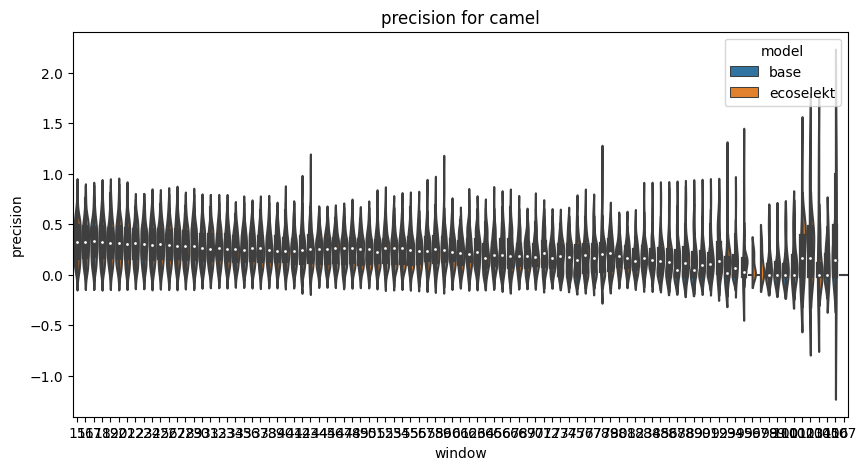

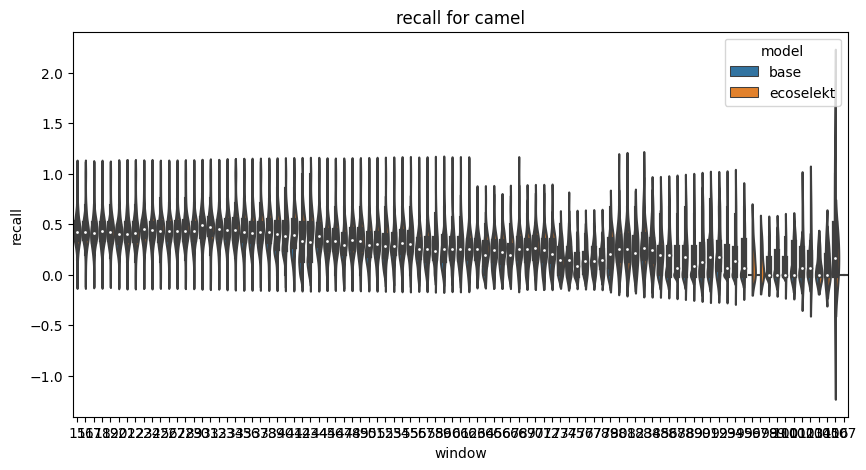

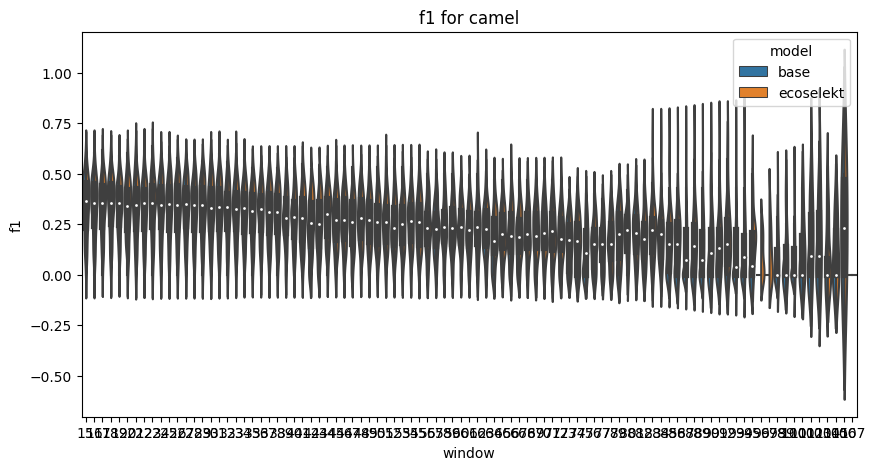

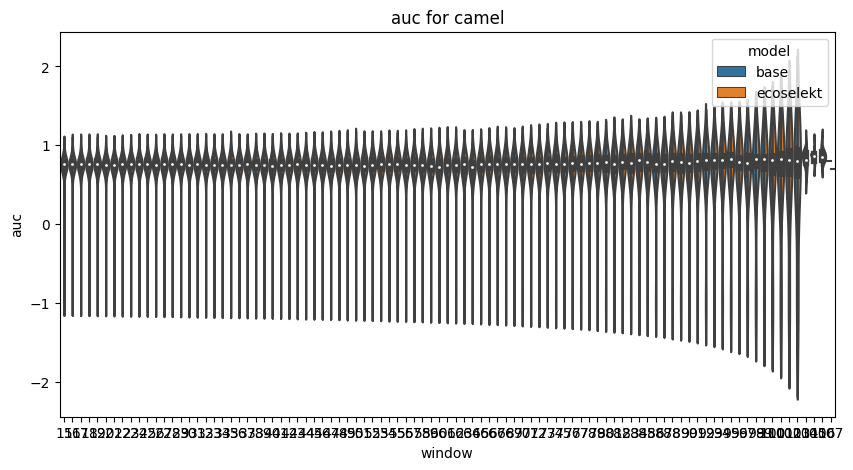

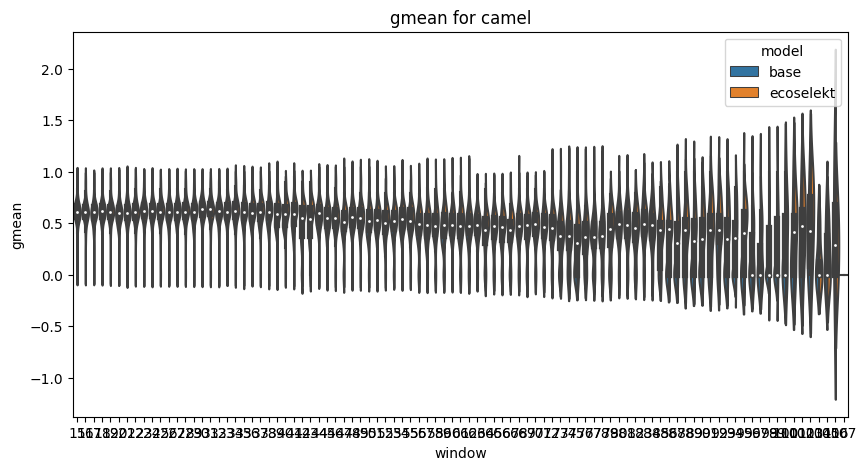

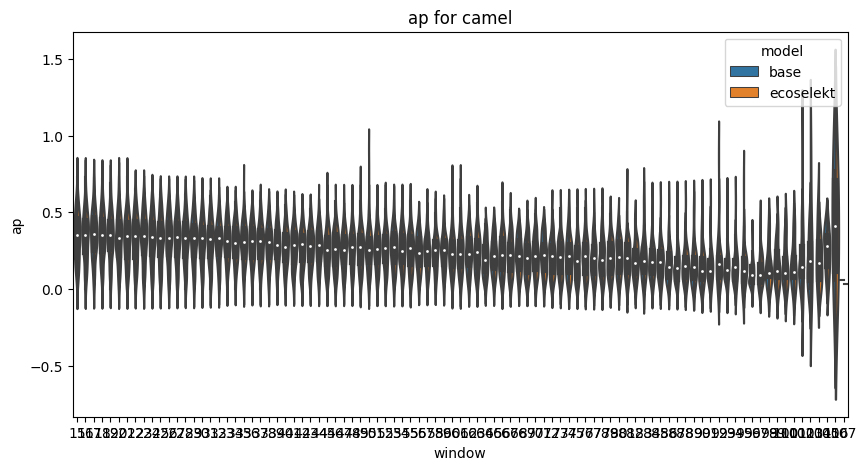

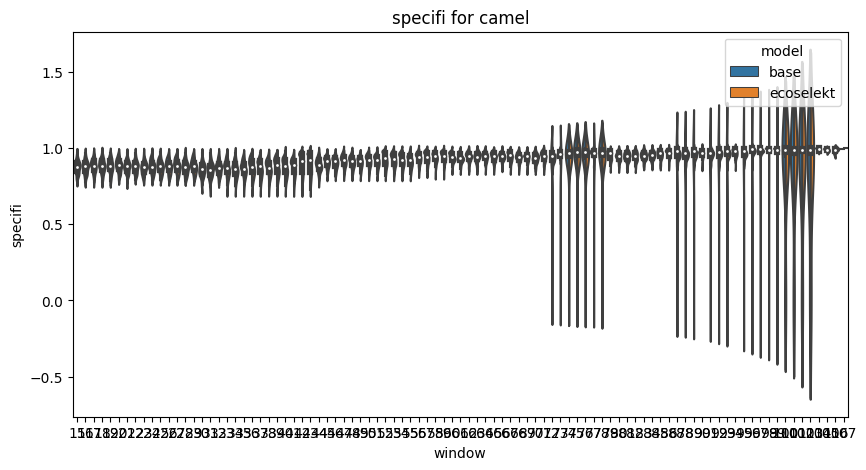

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


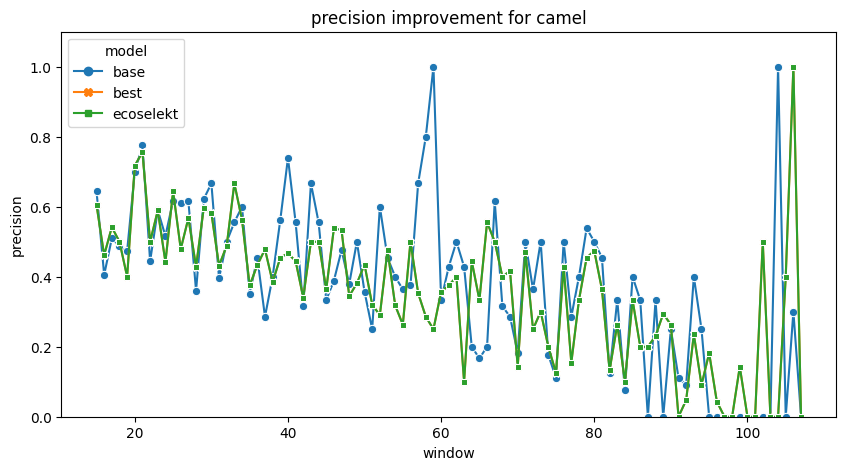

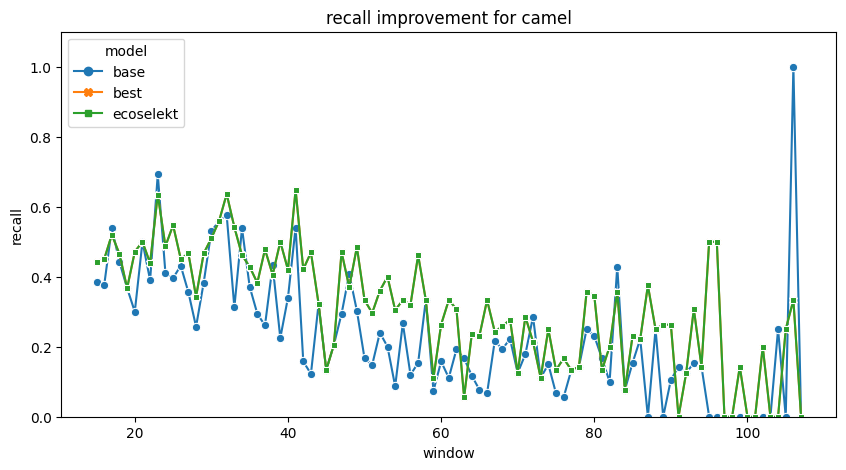

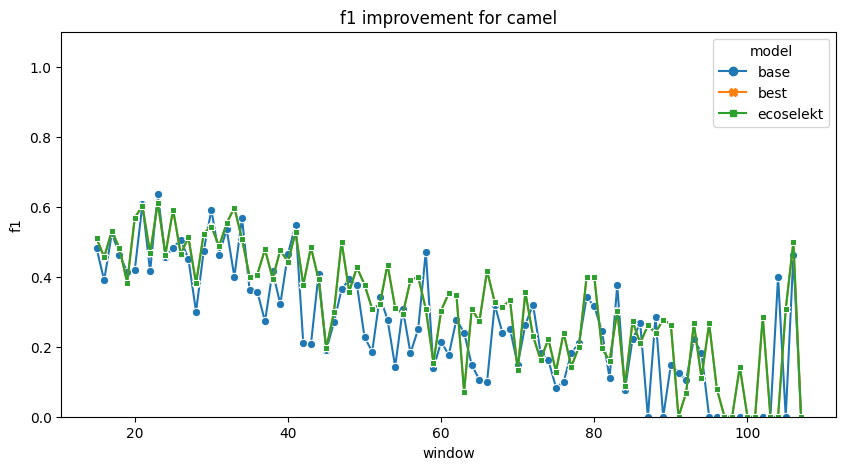

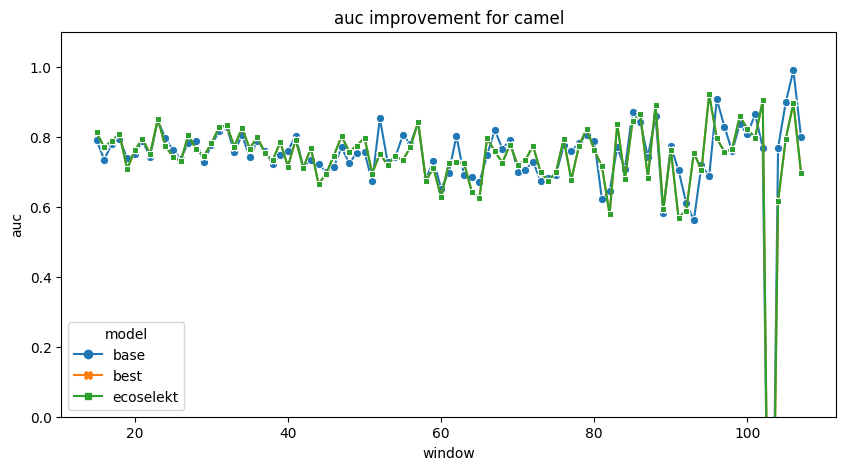

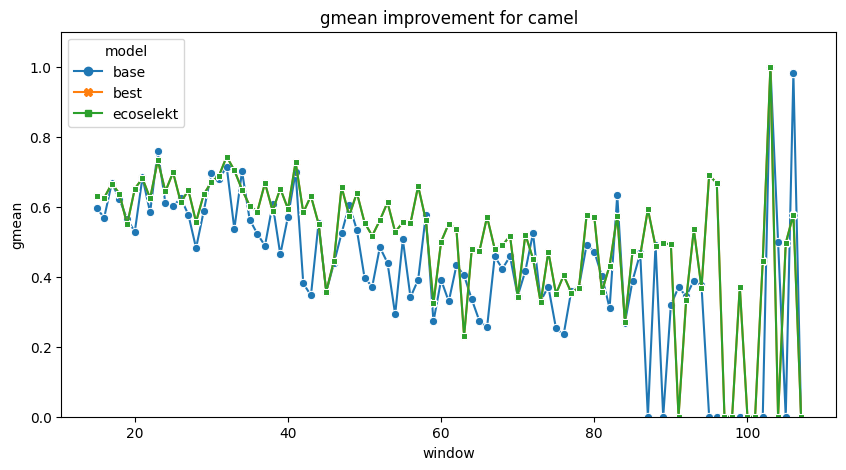

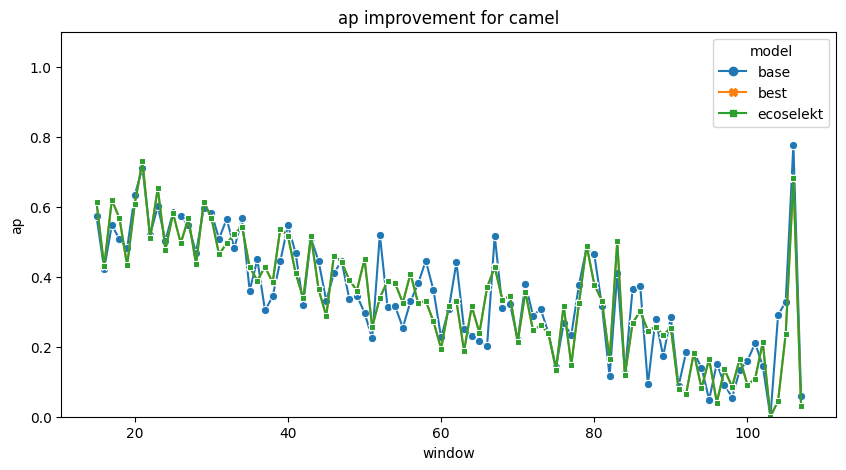

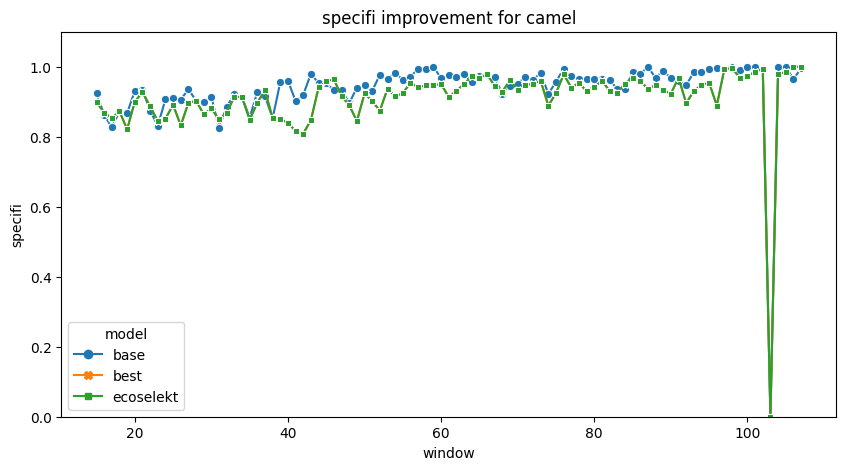

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

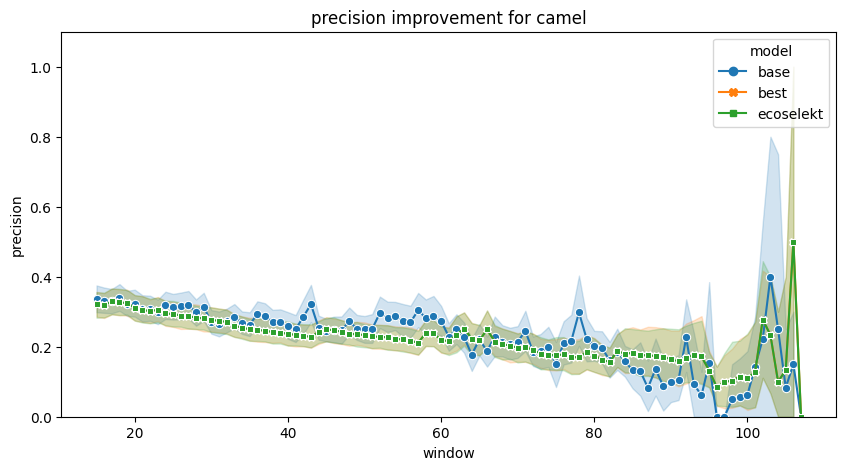

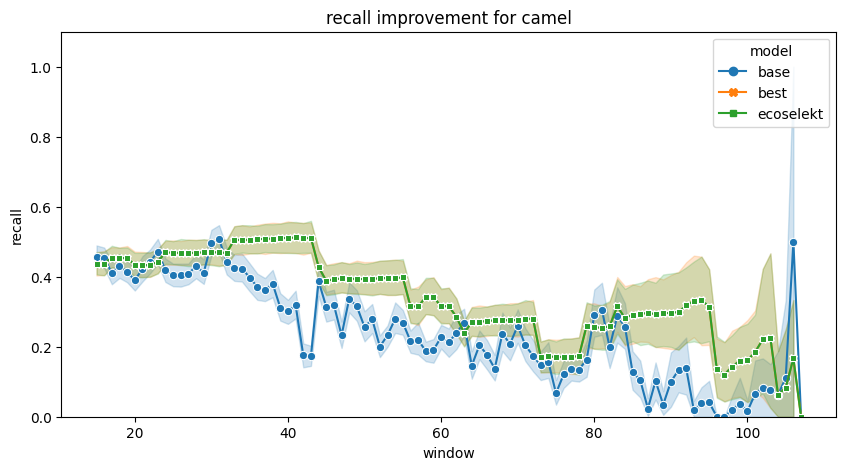

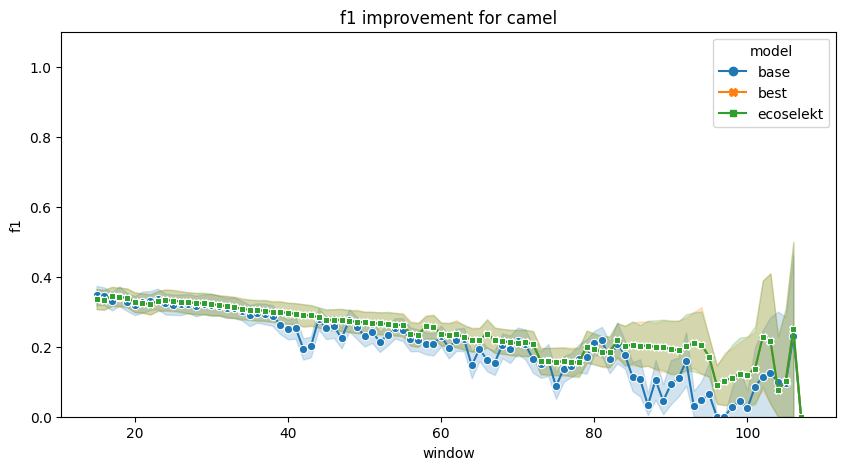

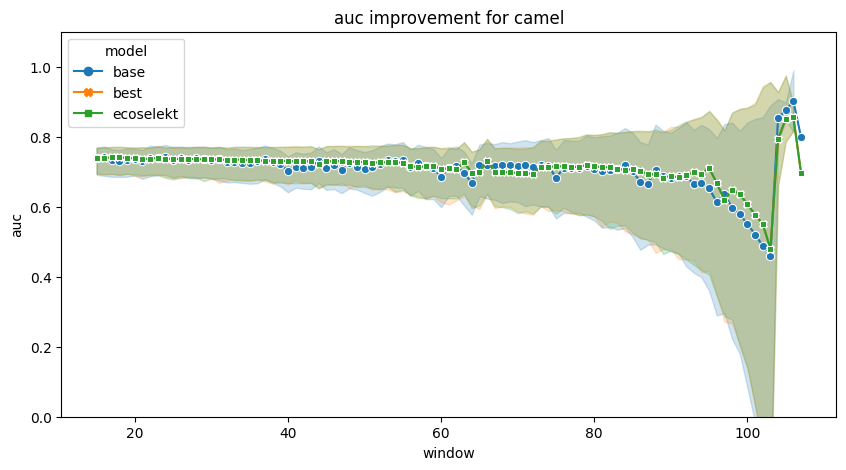

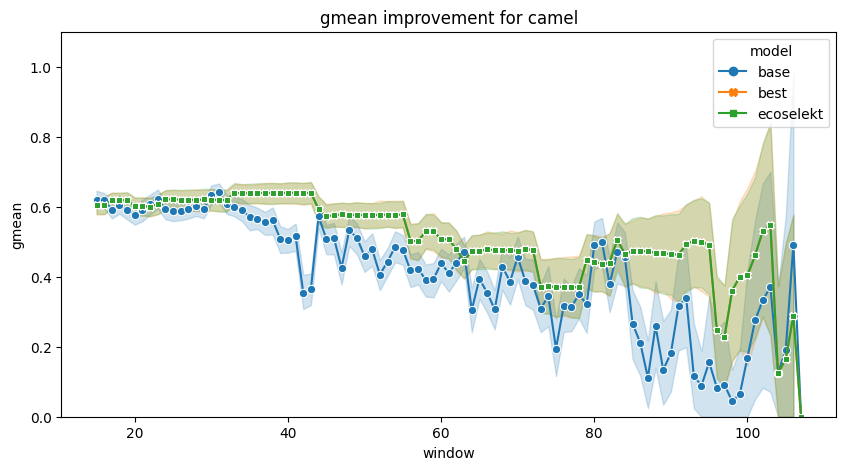

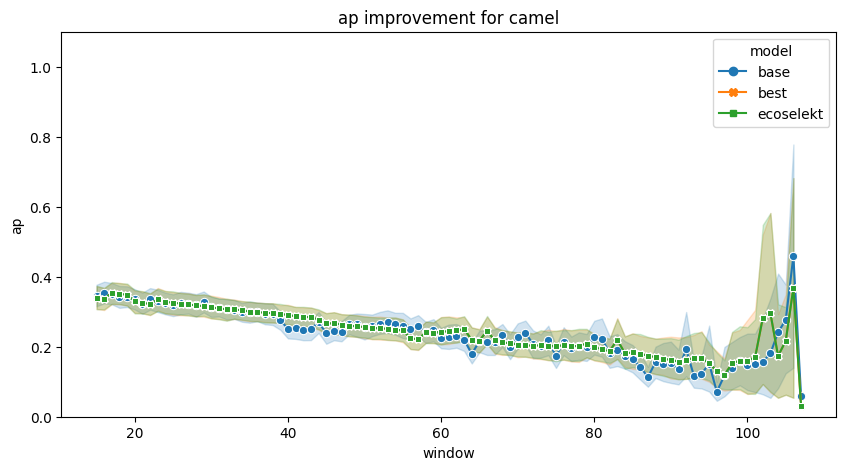

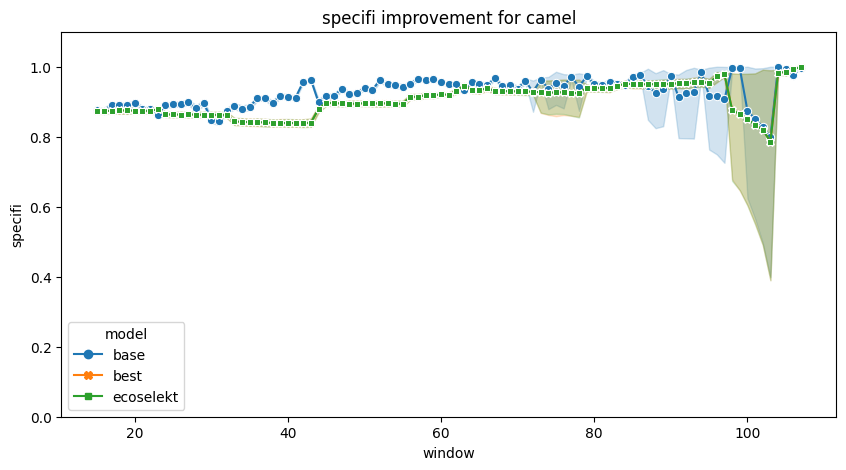

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.6826430659057389
Wilcoxon test significance: False


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 3.0588576810876195e-08
Wilcoxon test significance: True


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(874200, 4)


commit_id  window  test_split  model_version
0  0d6cbb2f5477f869c9d8afc8d02229d1d313b887      15          16             13
1  bbddee2286f6afeab59a4af335027f987437b333      15          16             13
2  0704c6101a0db2e50a9b276731f530f3a199dddf      15          16             13
3  9727746270d994789f35b6ac7b016f78e682e4d4      15          16             13
4  d33387951c0ab533262b6e2bba62375cc119a5b0      15          16             13

In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(874200, 4)


commit_id  window  test_split  model_version
0  02d95d4650196228ef63acffc033e99c924b7dd0      15          16             15
1  02ff15739a00397e8f246a5789eee87d15cdbba1      15          16             15
2  039bb17e8ae63b93890f2a6536cf0553351a07df      15          16             15
3  04c51fb2693009d4ca15b200d4bac377a6e334a7      15          16             15
4  070129e8d74de9014ec8f3b15cf8dc39afd3c2ae      15          16             15

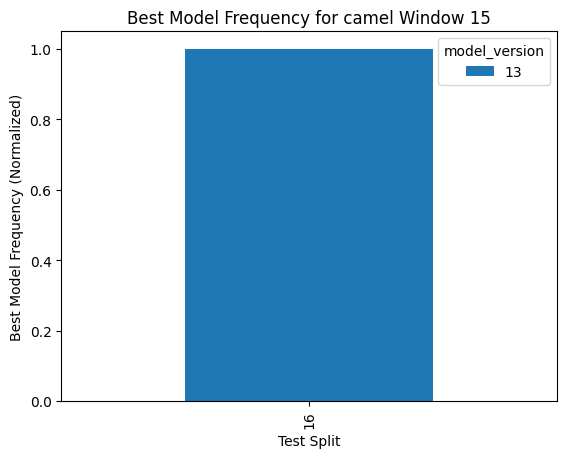

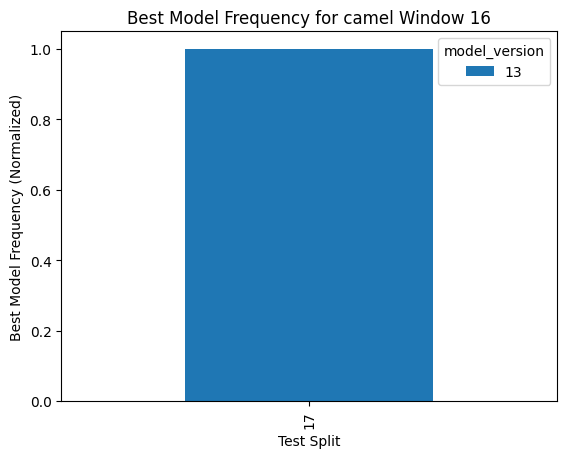

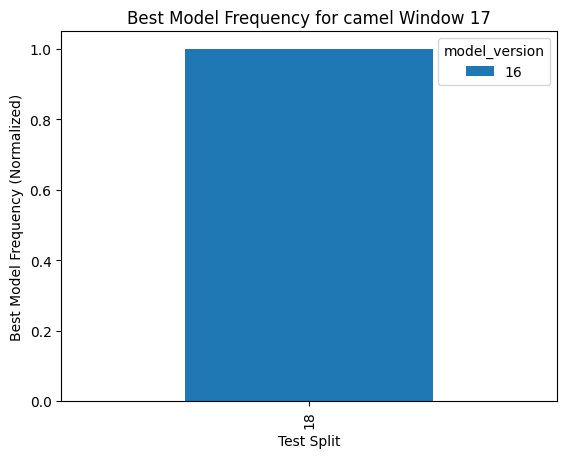

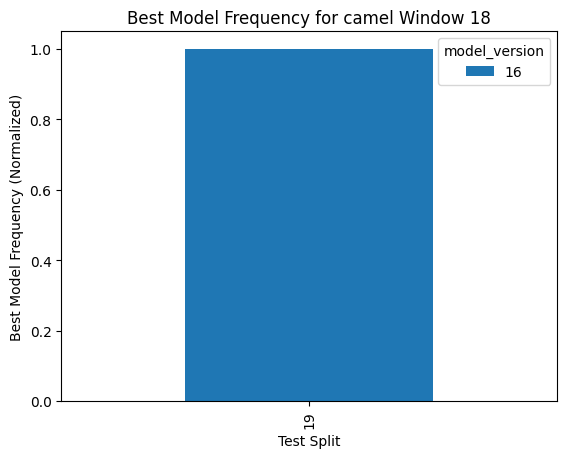

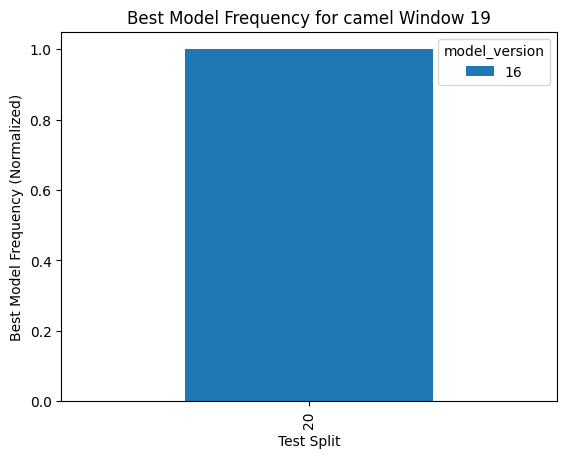

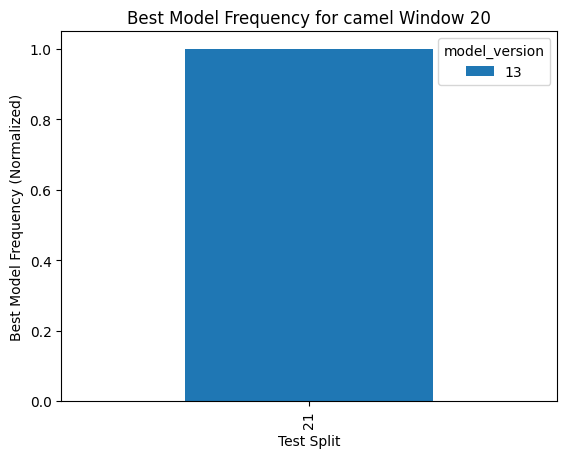

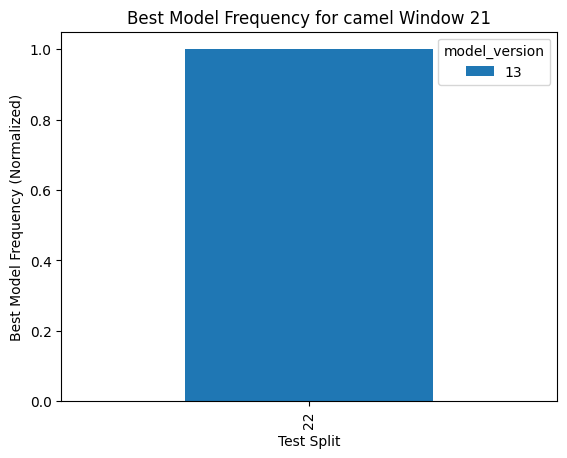

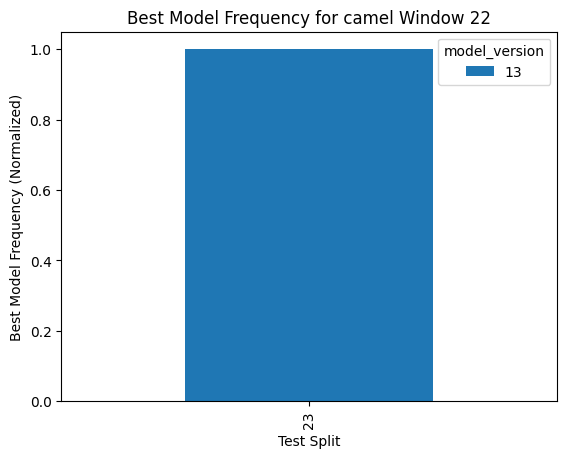

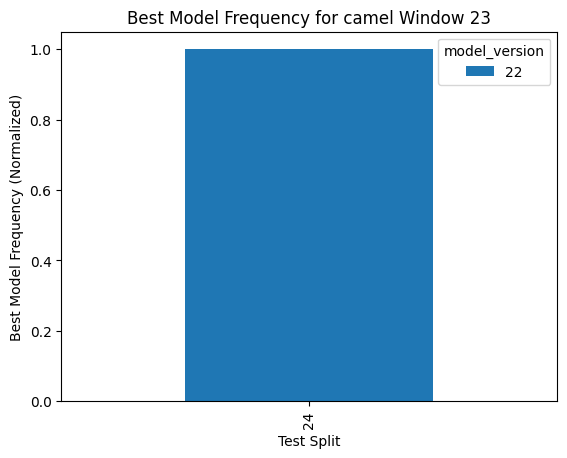

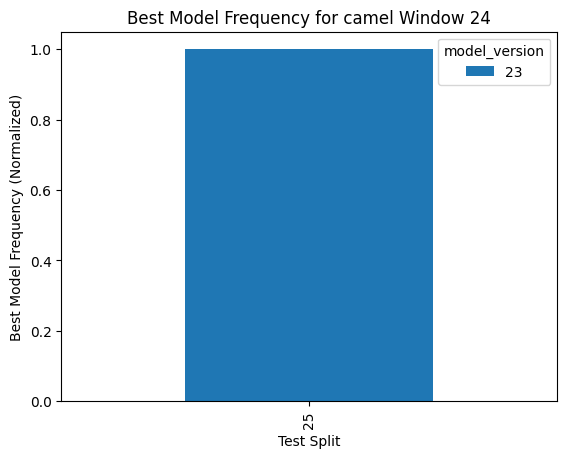

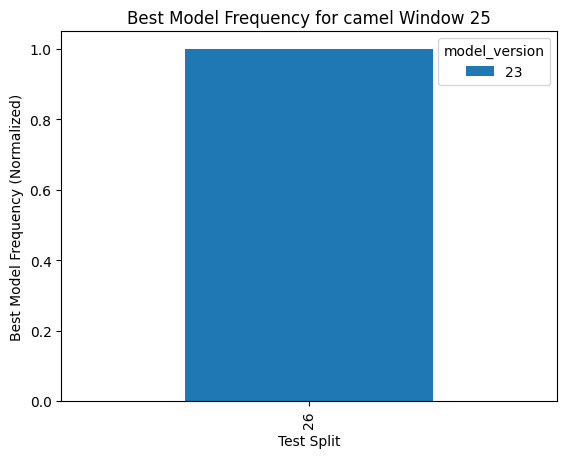

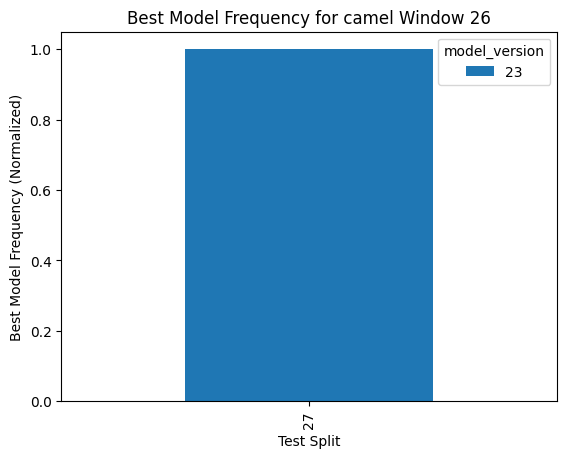

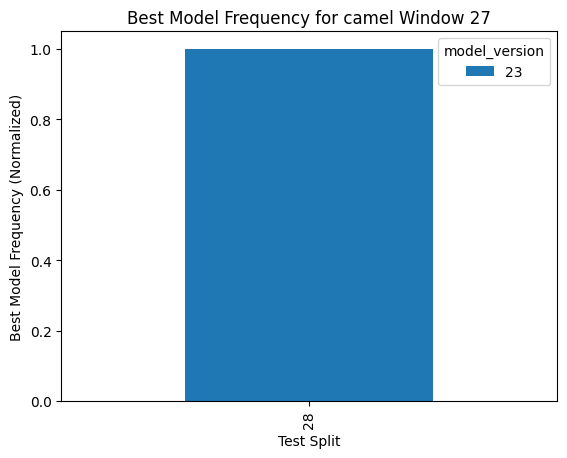

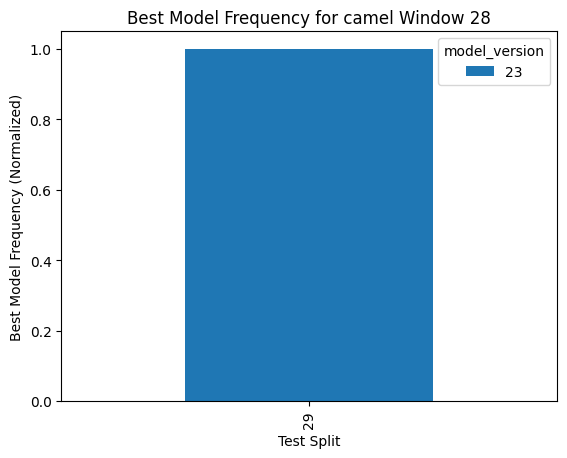

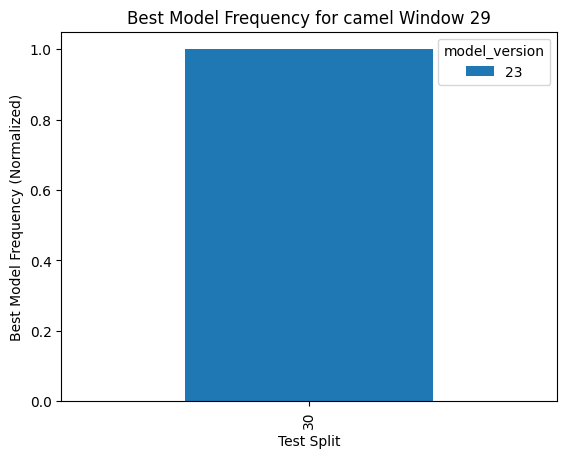

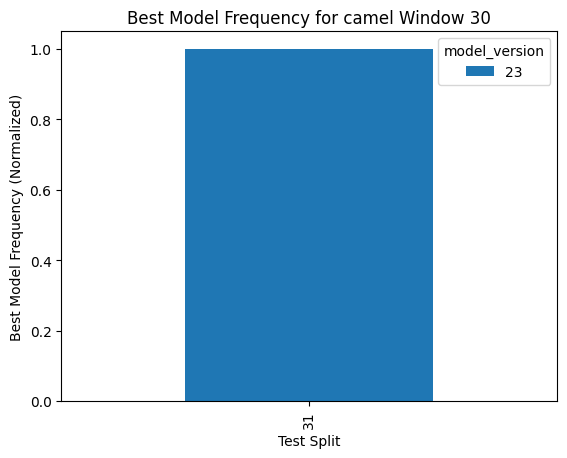

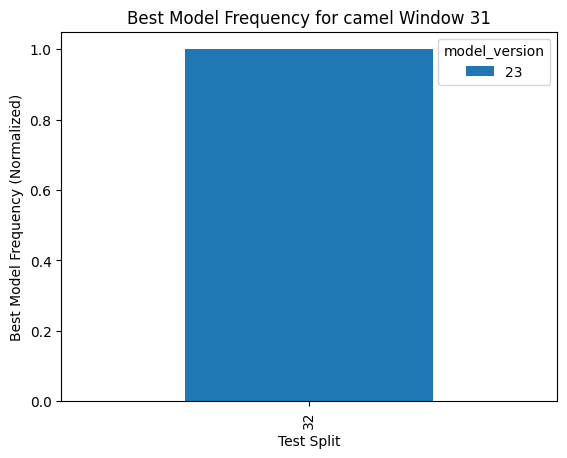

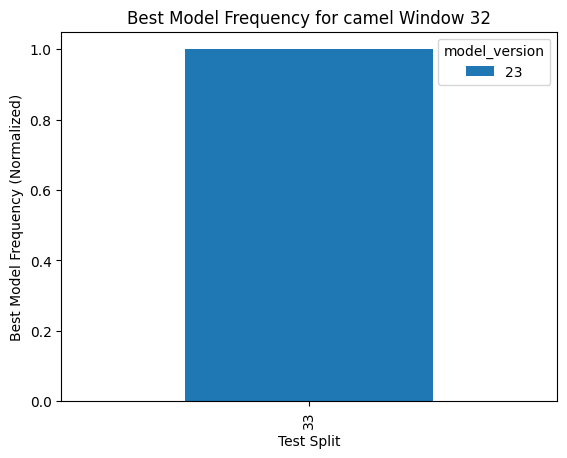

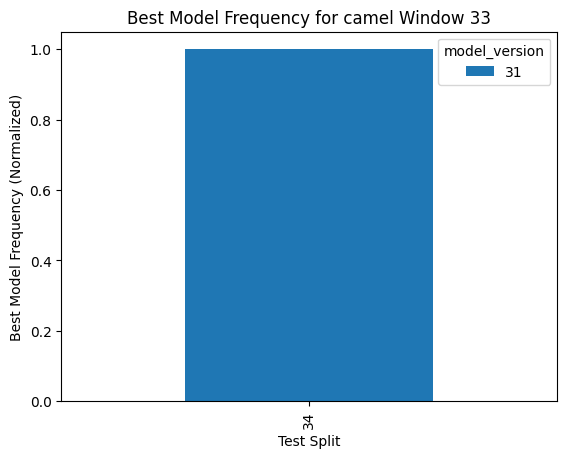

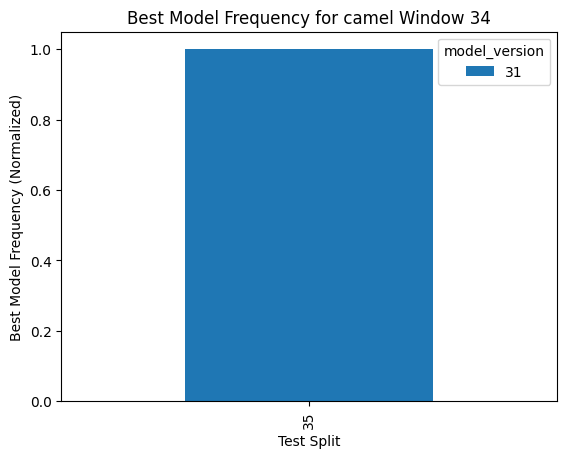

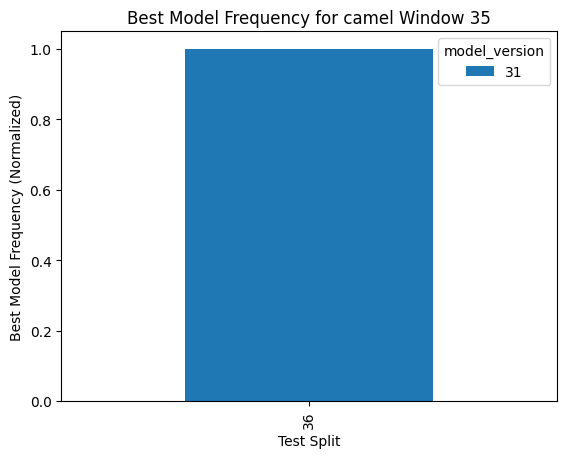

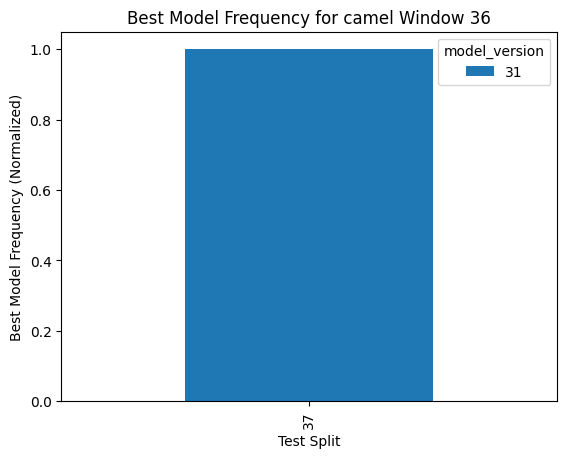

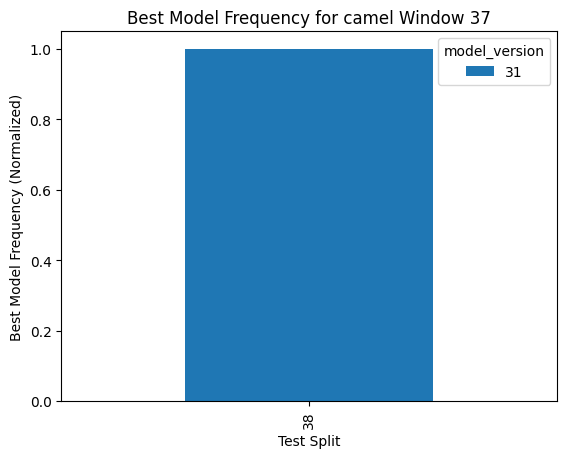

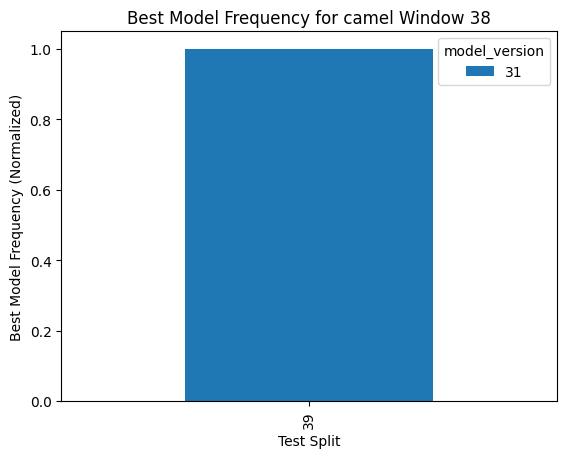

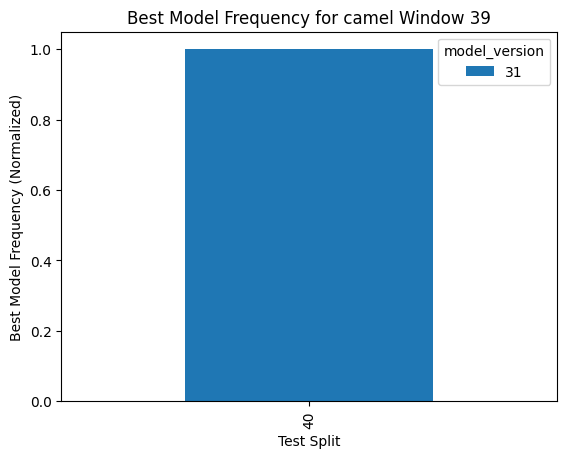

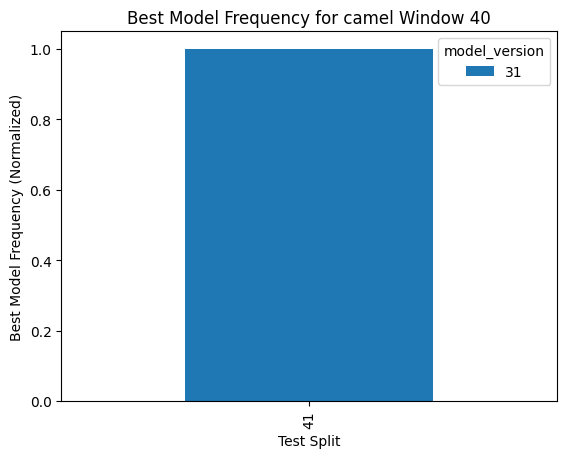

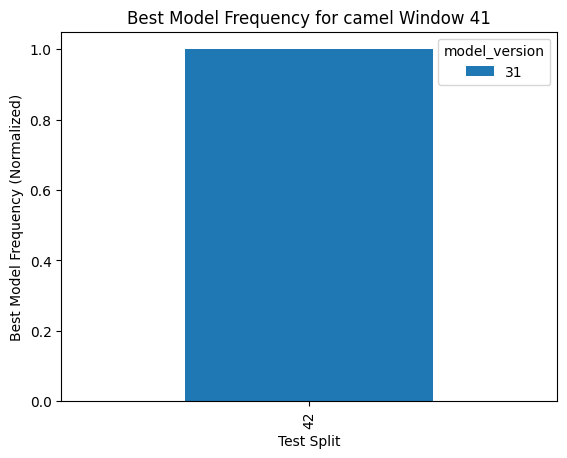

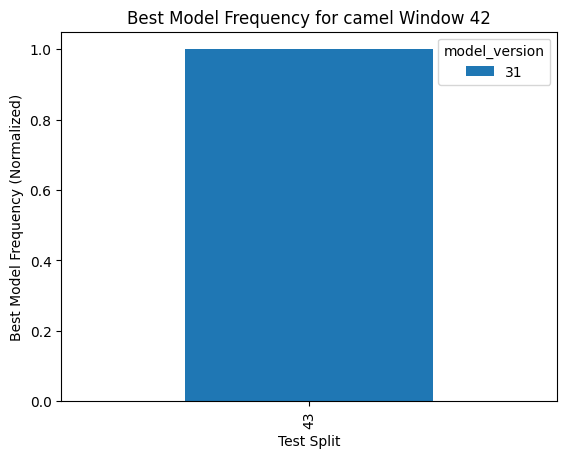

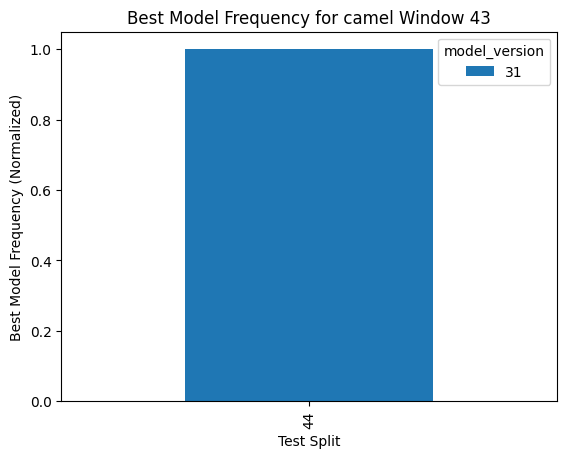

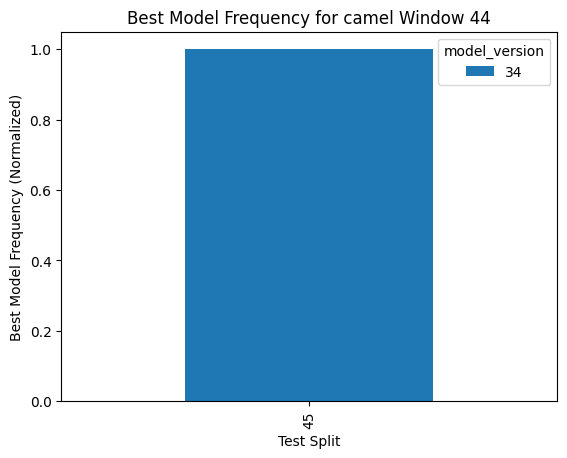

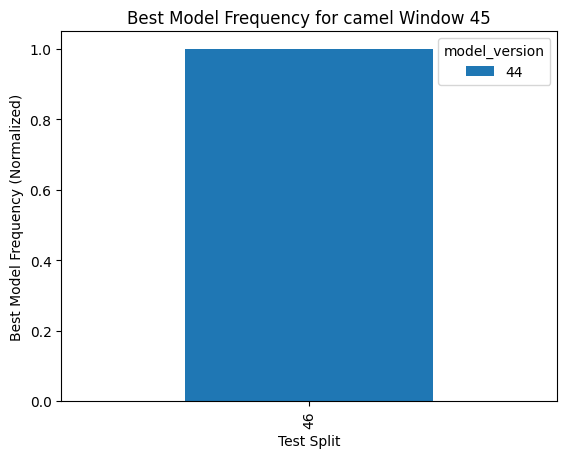

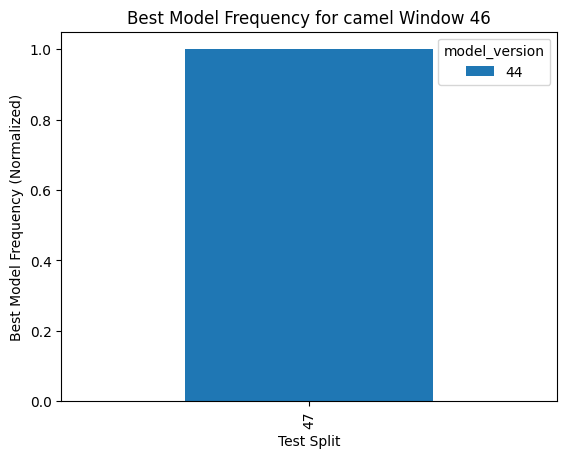

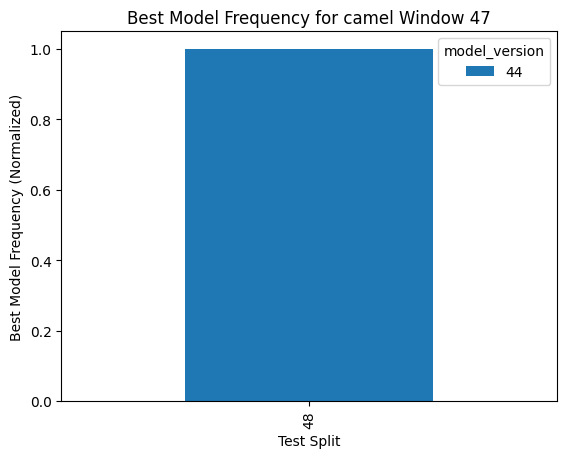

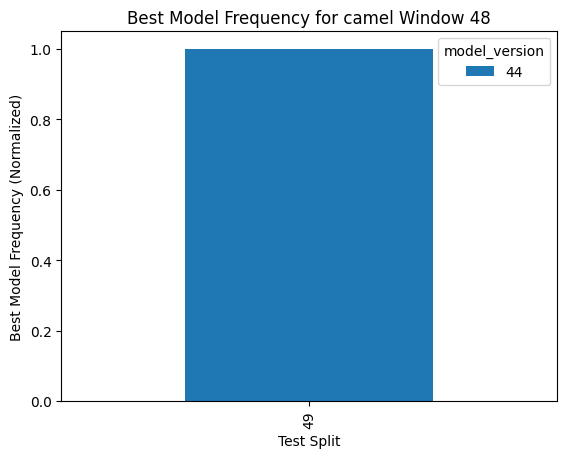

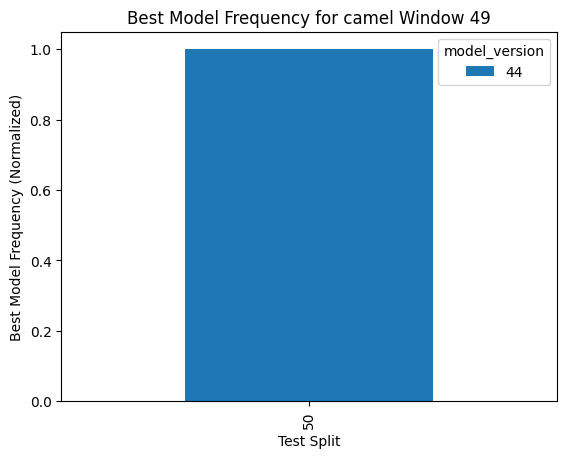

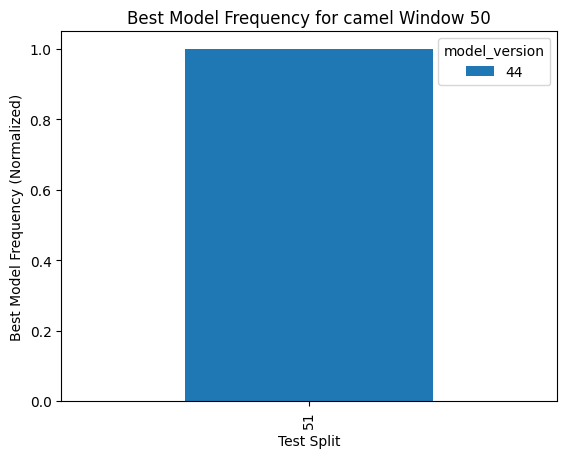

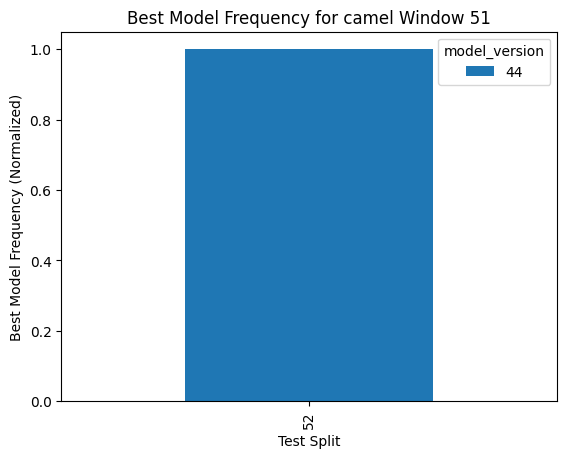

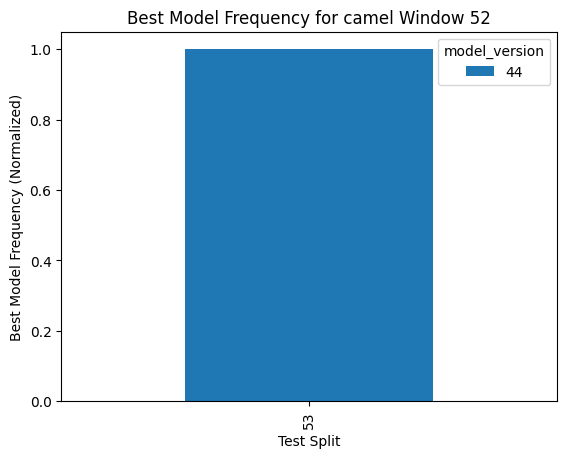

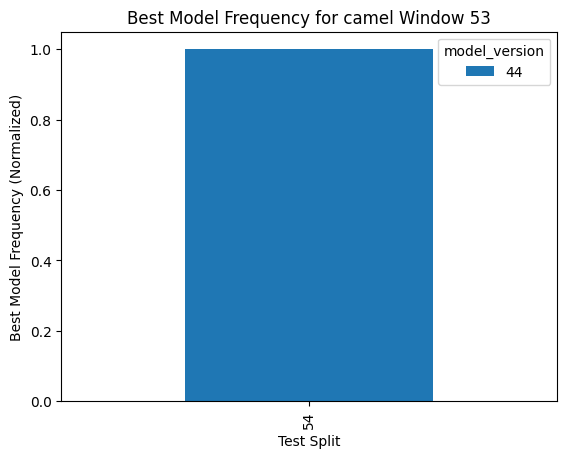

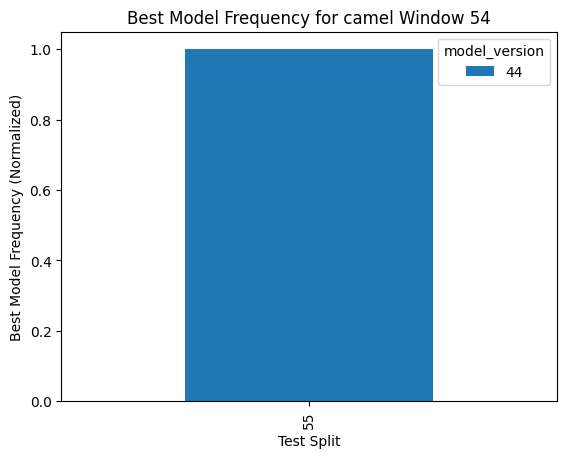

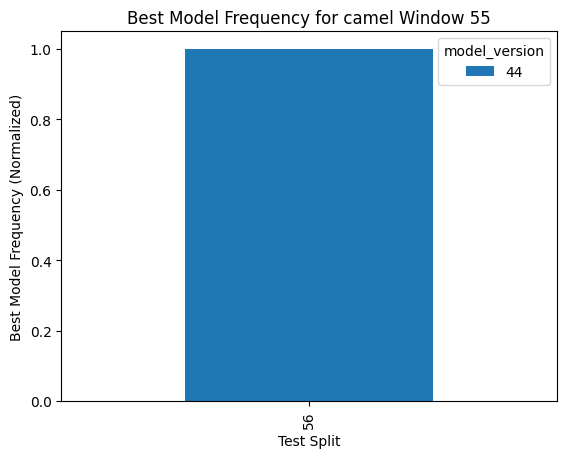

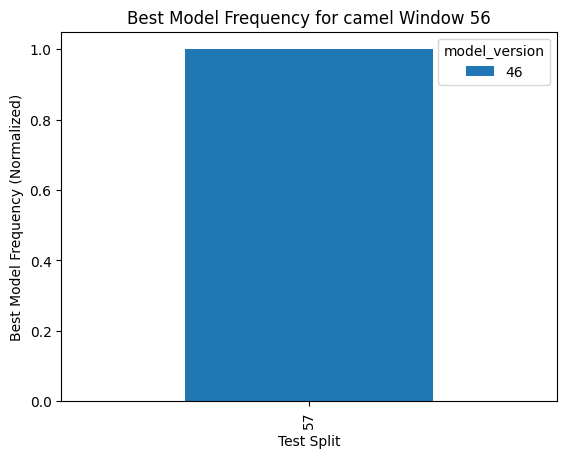

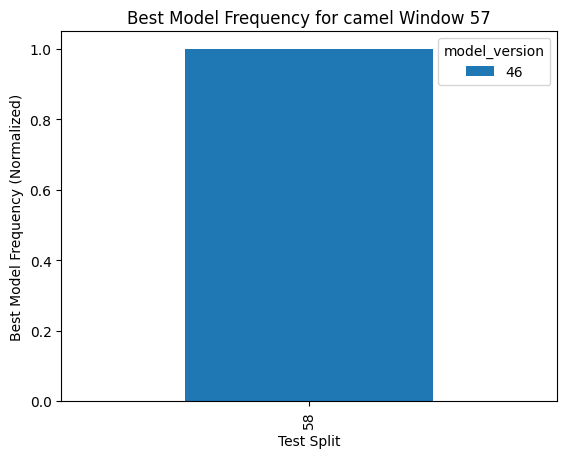

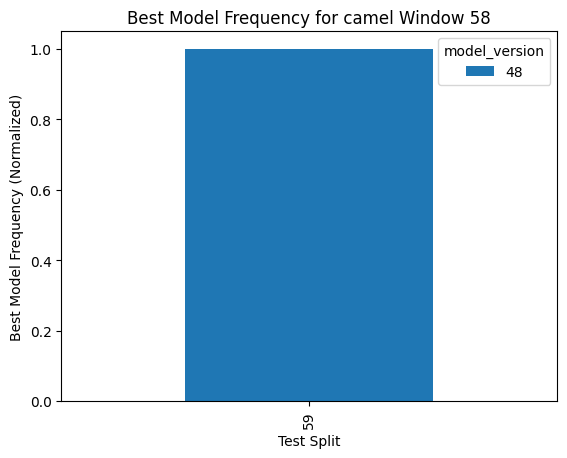

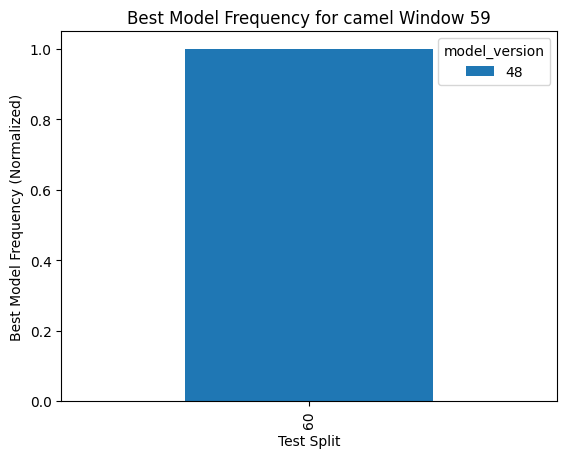

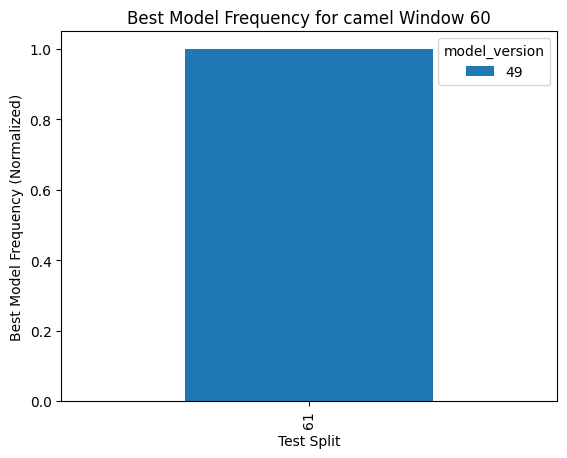

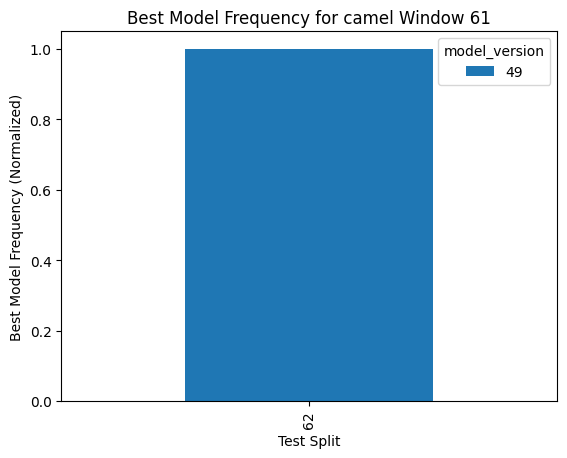

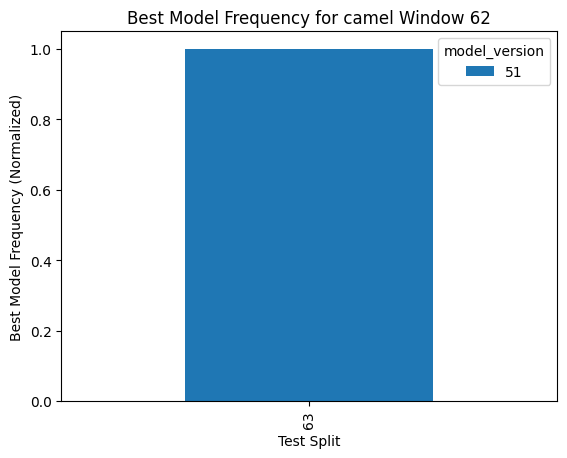

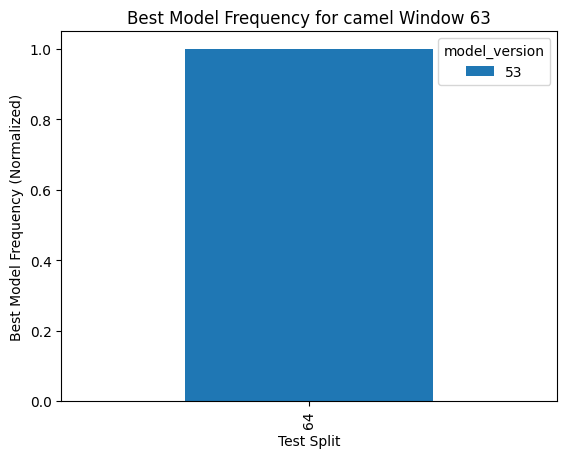

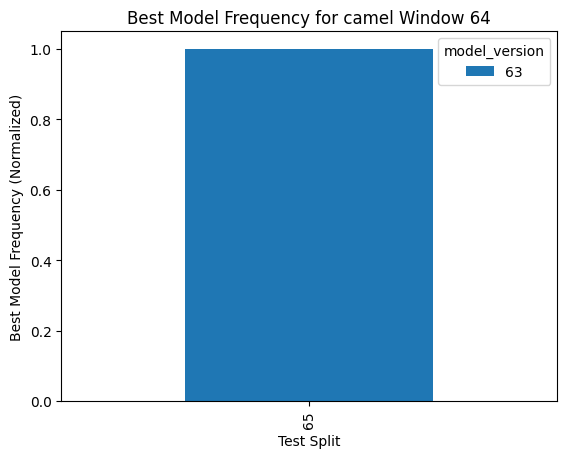

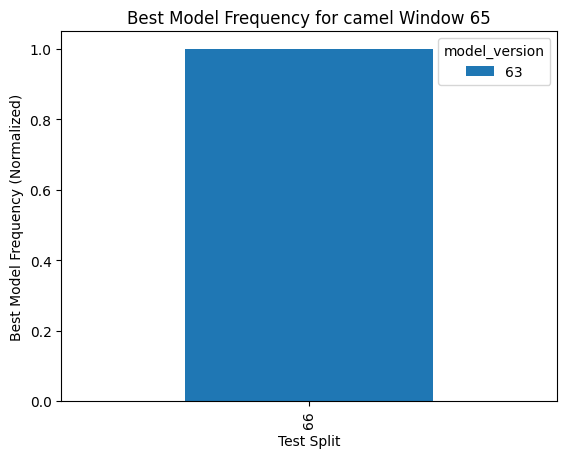

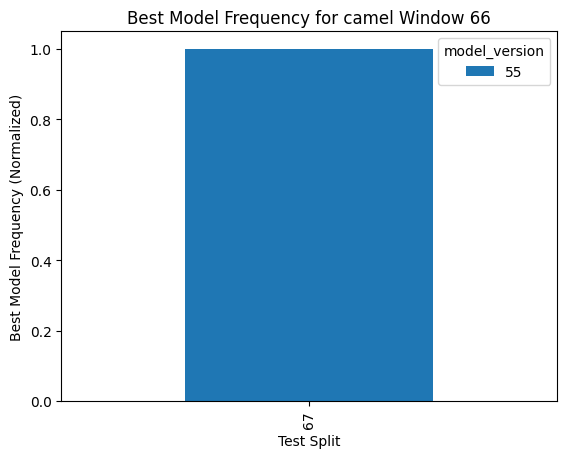

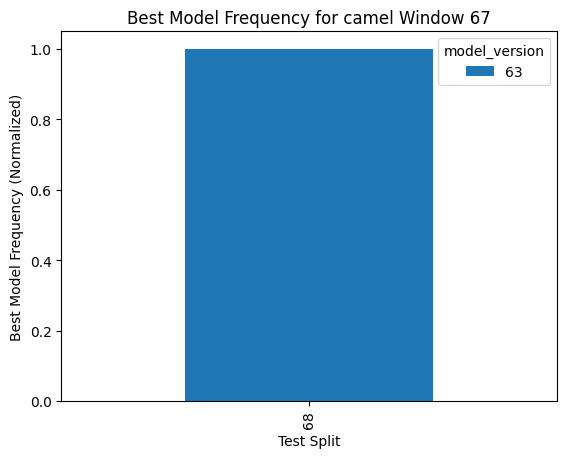

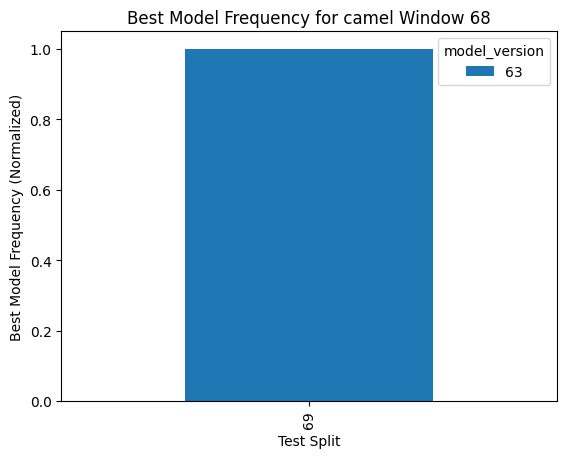

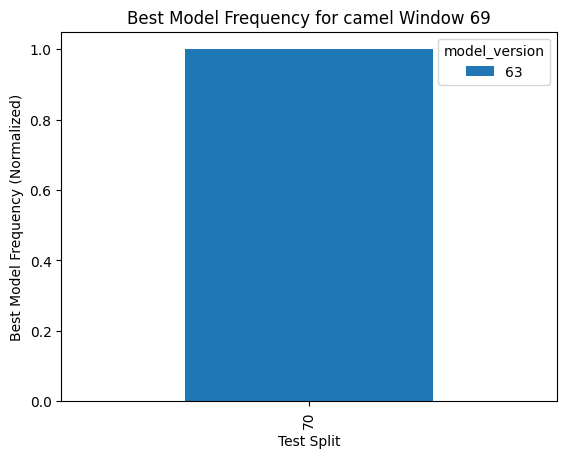

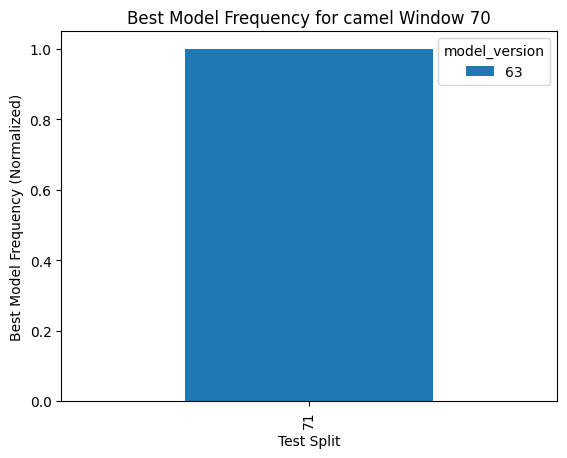

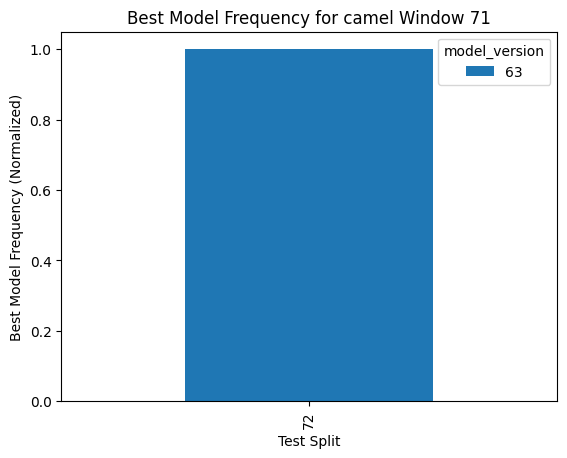

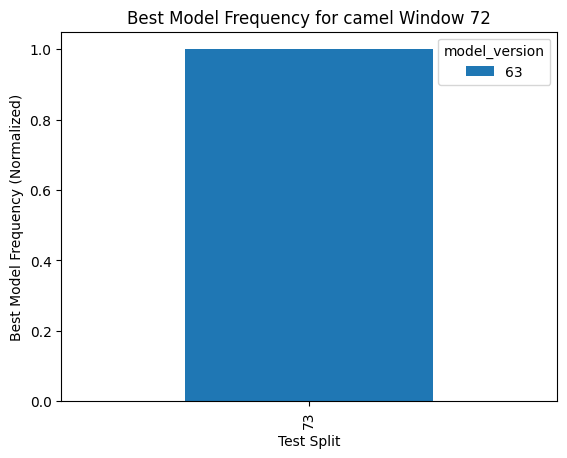

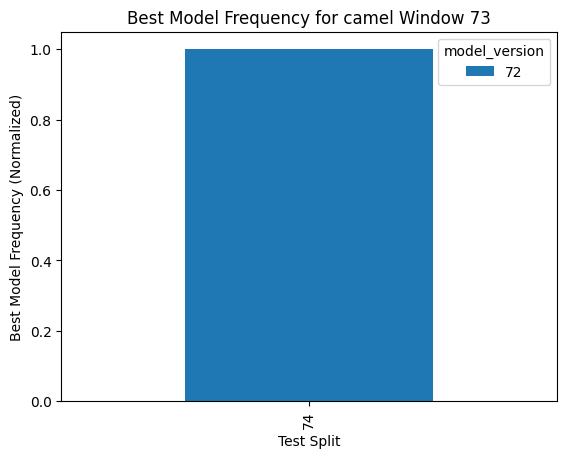

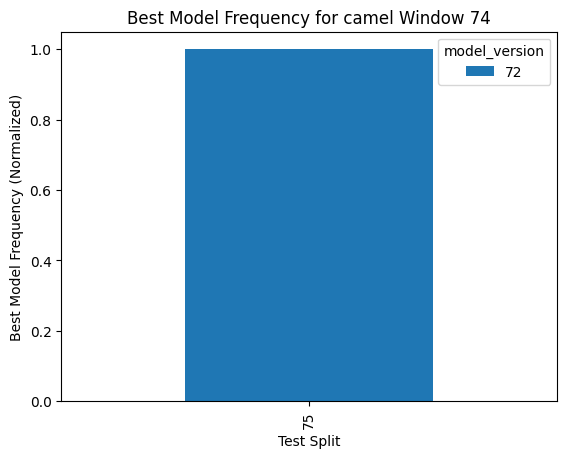

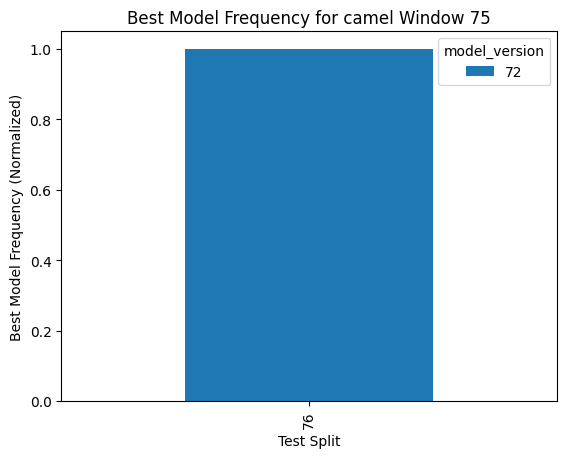

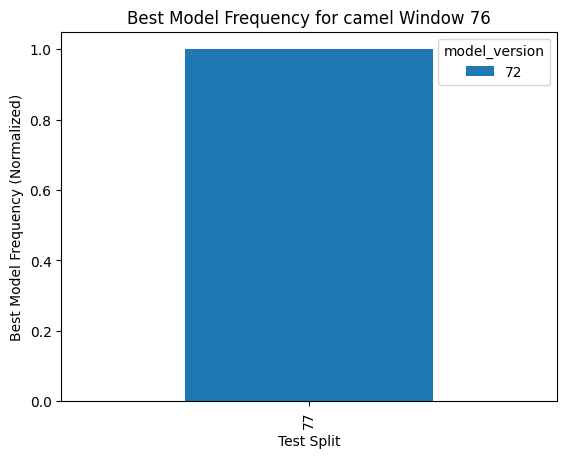

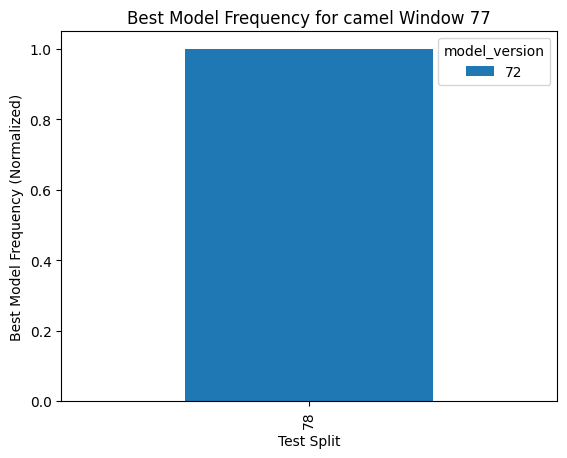

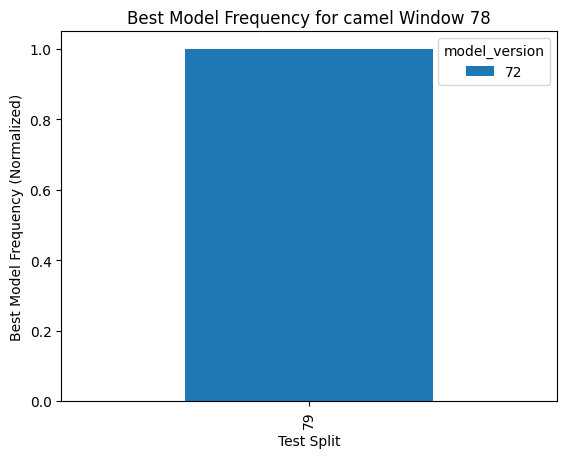

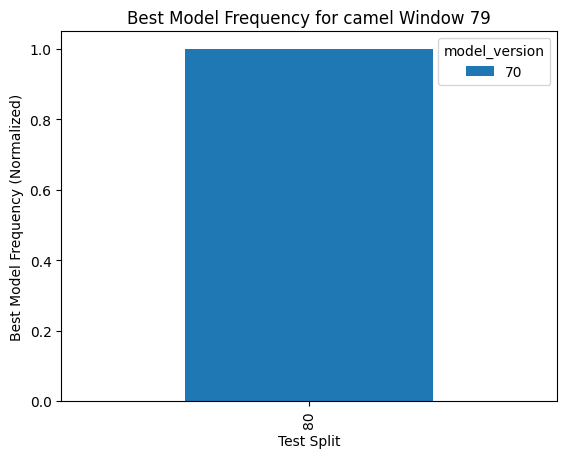

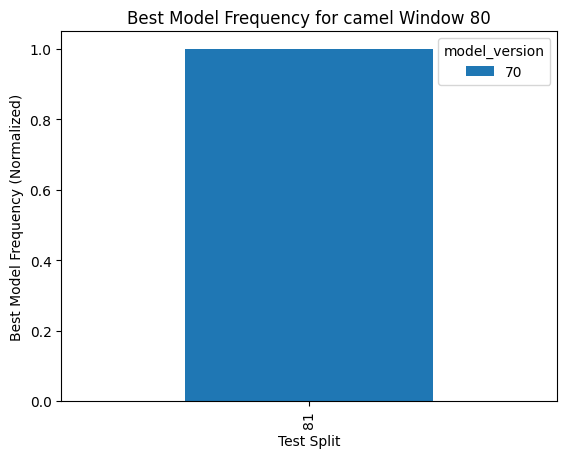

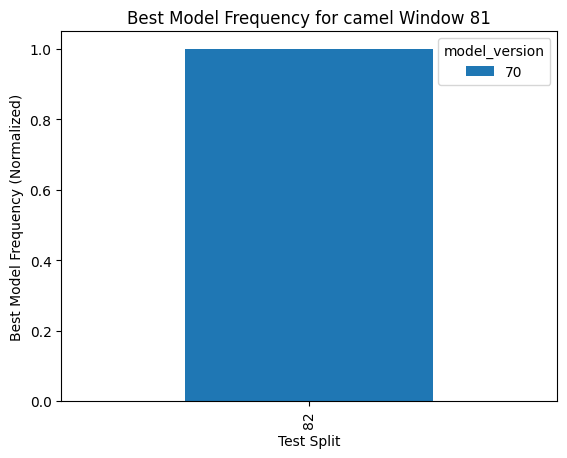

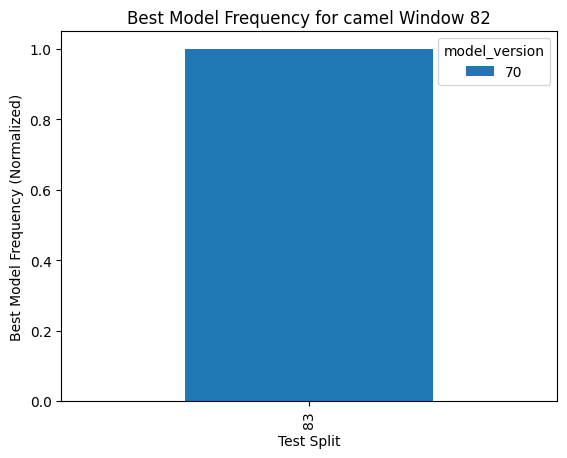

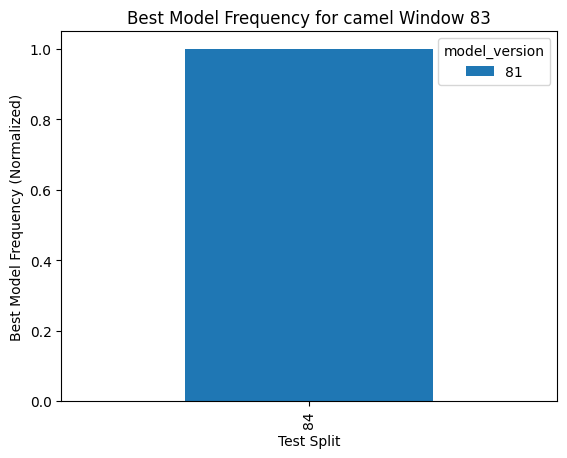

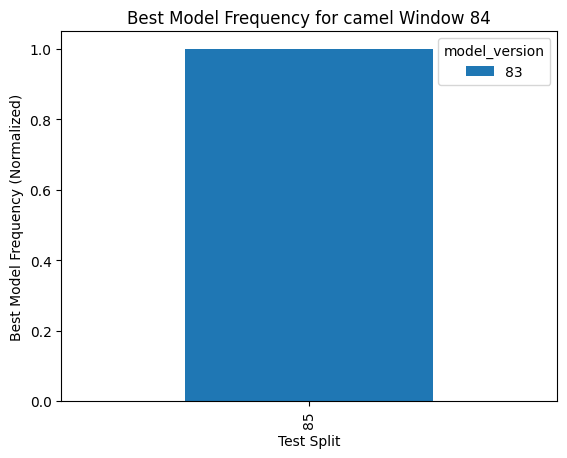

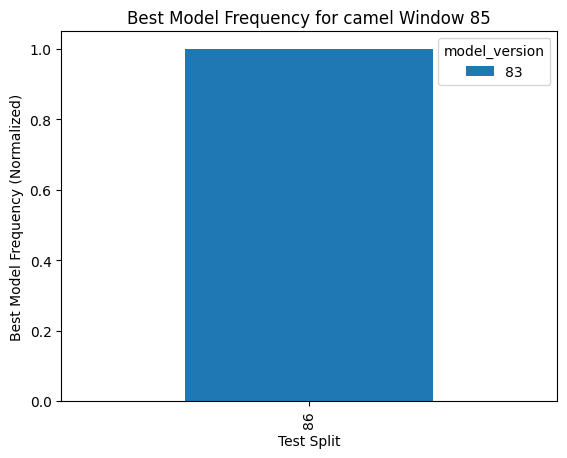

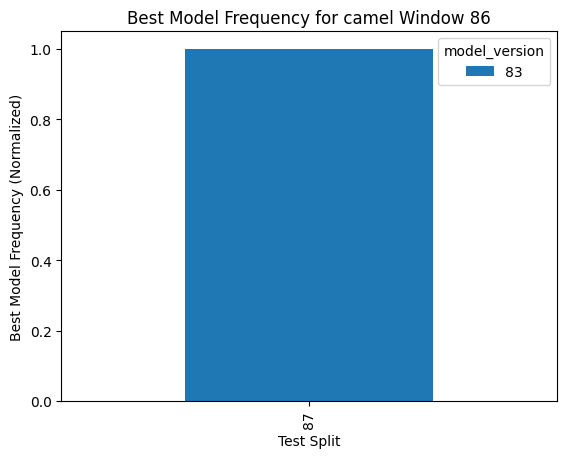

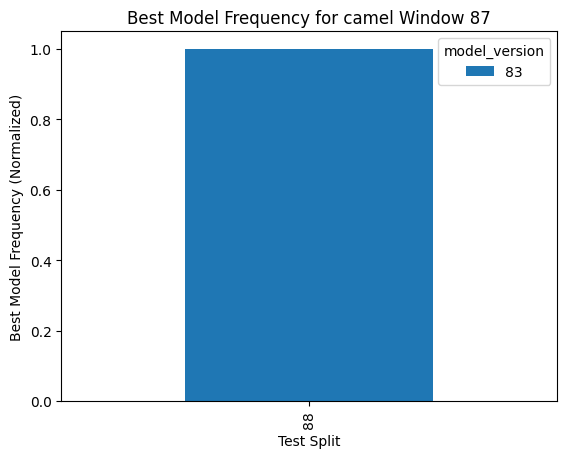

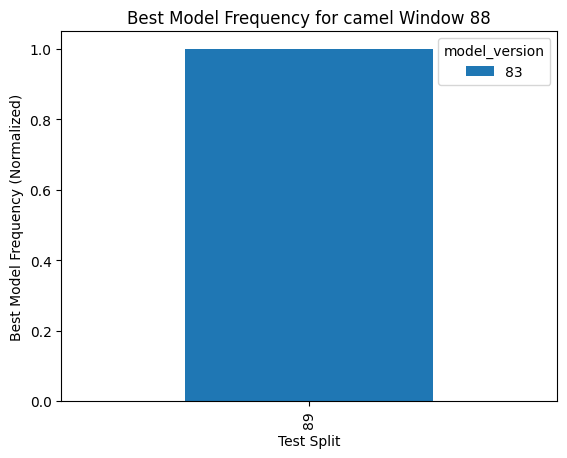

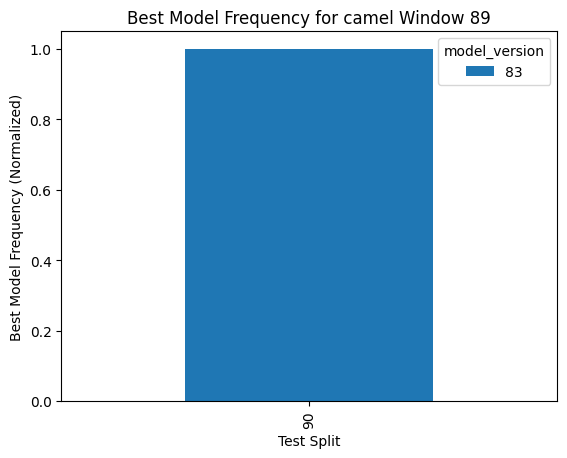

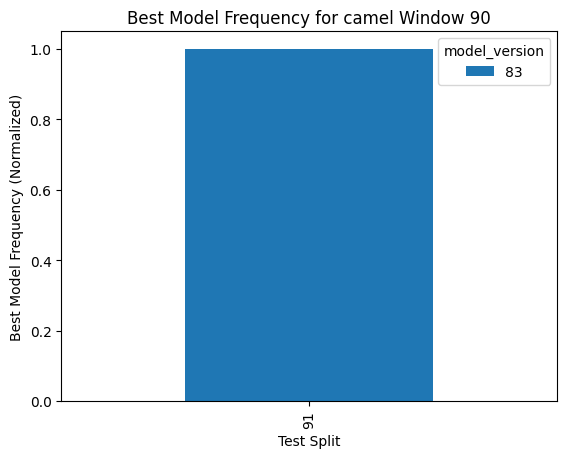

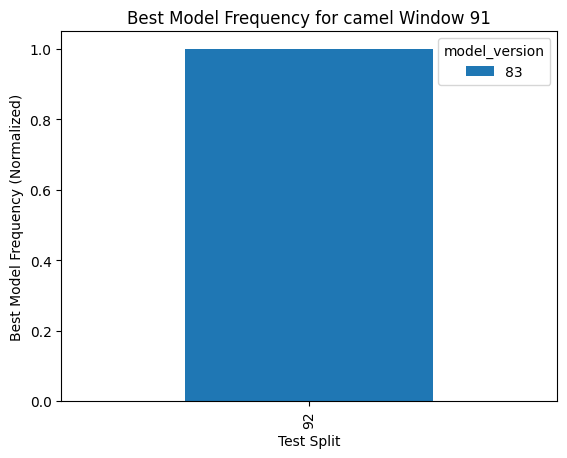

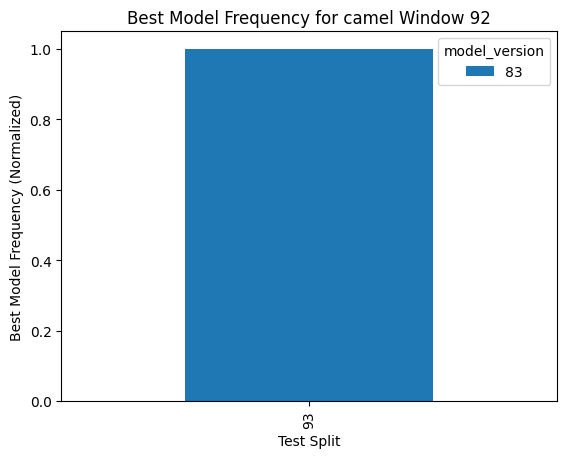

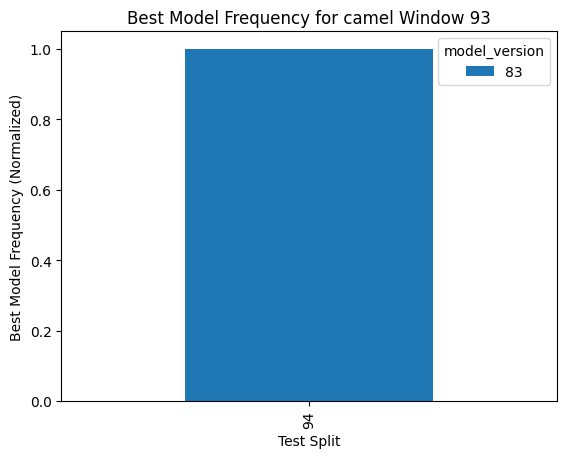

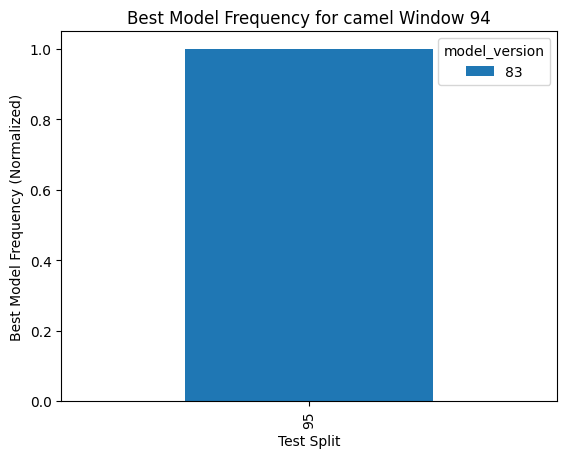

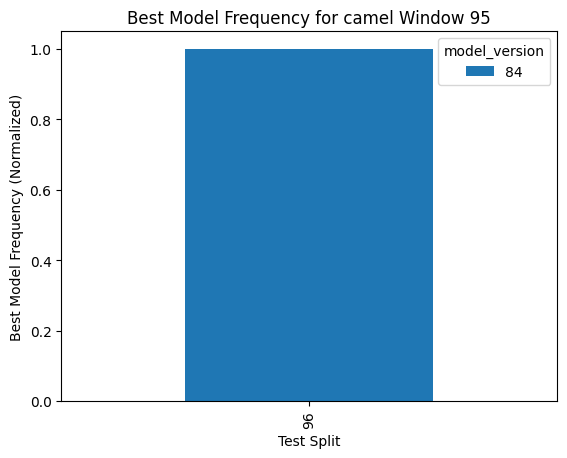

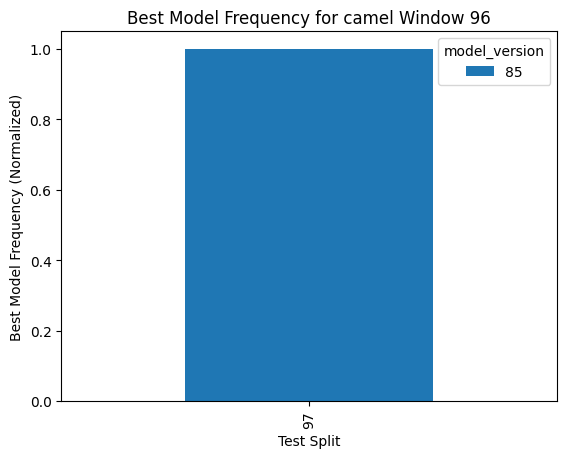

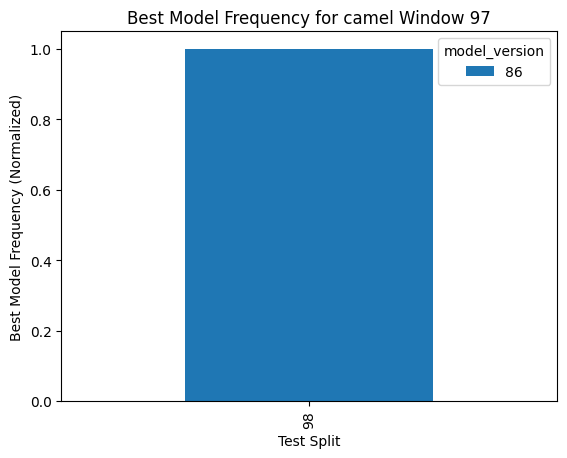

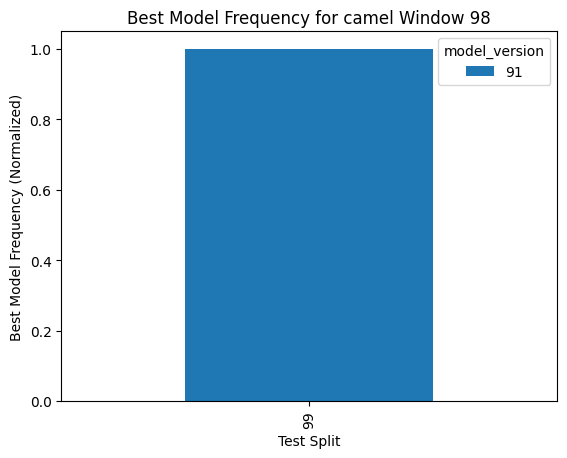

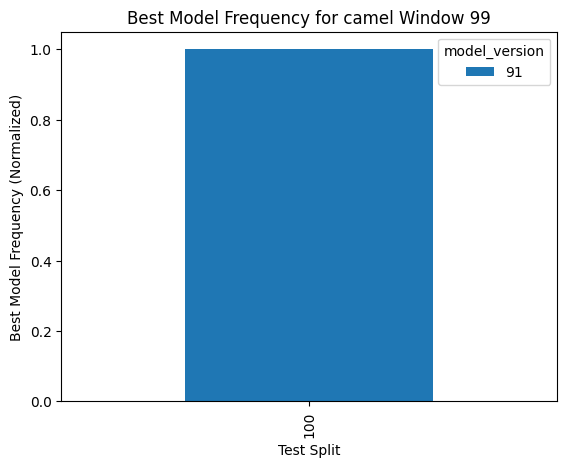

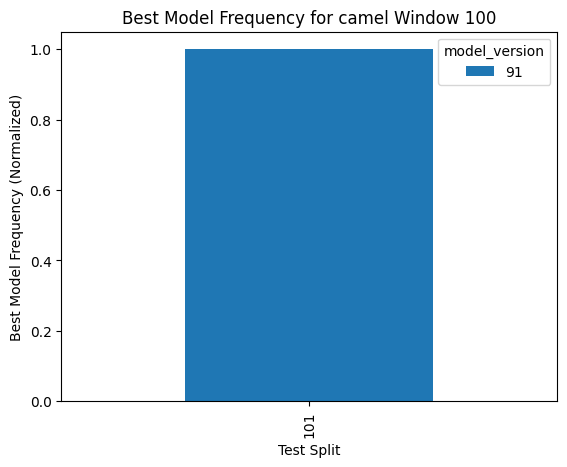

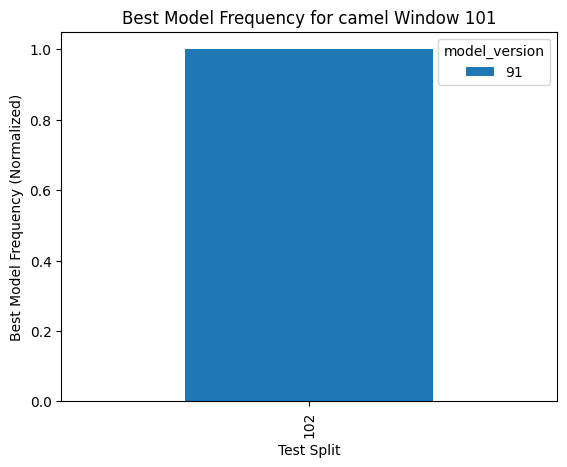

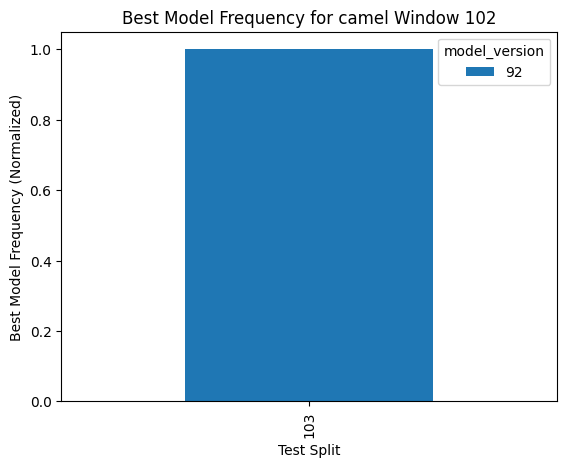

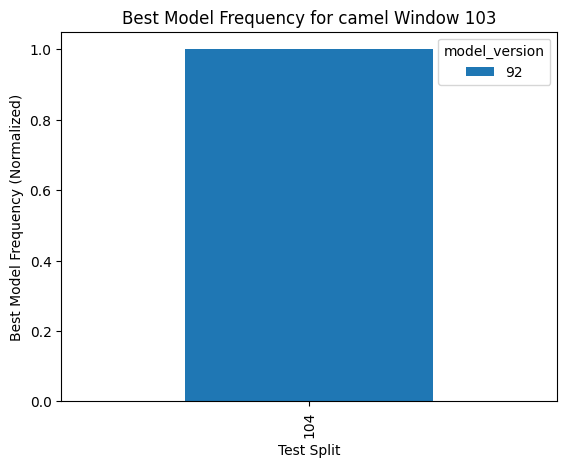

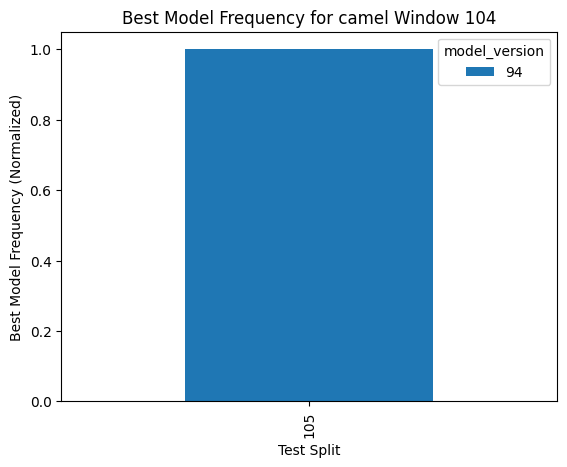

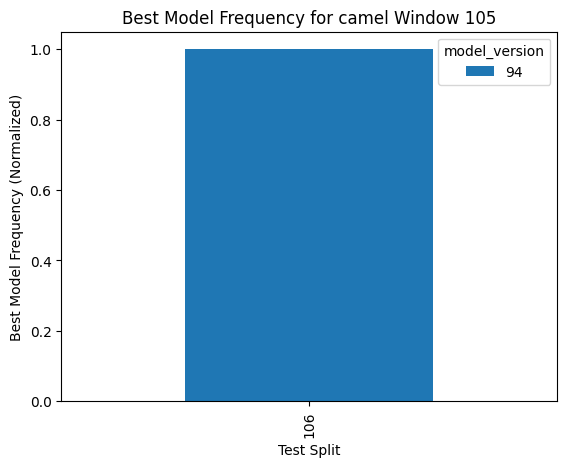

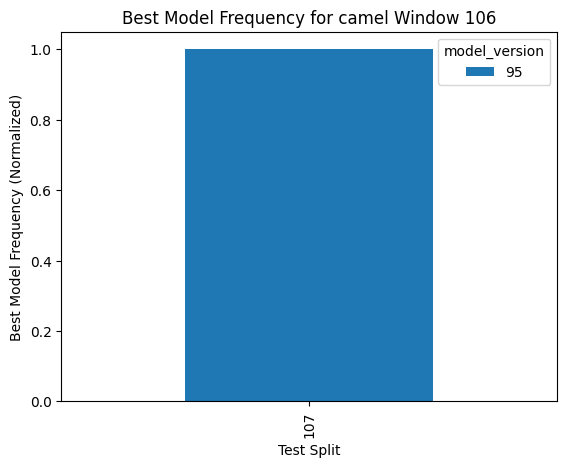

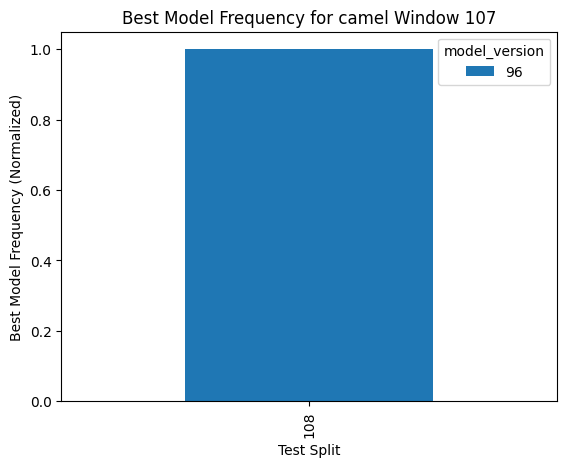

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")